In [1]:
import os

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Trimming Fashion Mnist

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
np.unique(train_Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

0: T_shirt
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot  
=> 1,4,7,8

In [5]:
specific_idx = np.where((train_Y == 1) | (train_Y == 4) | (train_Y == 7) | (train_Y == 8))
np.shape(specific_idx)

(1, 24000)

In [6]:
new_train_X = train_X[specific_idx]
new_train_Y = train_Y[specific_idx]

In [7]:
print(np.shape(train_X))
print(np.shape(new_train_X))

(60000, 28, 28)
(24000, 28, 28)


In [8]:
specific_idx2 = np.where((test_Y == 1) | (test_Y == 4) | (test_Y == 7) | (test_Y == 8))
np.shape(specific_idx2)

(1, 4000)

In [9]:
new_test_X = test_X[specific_idx2]
new_test_Y = test_Y[specific_idx2]

In [10]:
print(np.shape(test_X))
print(np.shape(new_test_X))

(10000, 28, 28)
(4000, 28, 28)


In [11]:
new_train_Y[np.where(new_train_Y ==1)] = 0
new_train_Y[np.where(new_train_Y ==4)] = 1
new_train_Y[np.where(new_train_Y ==7)] = 2
new_train_Y[np.where(new_train_Y ==8)] = 3

In [12]:
new_test_Y[np.where(new_test_Y ==1)] = 0
new_test_Y[np.where(new_test_Y ==4)] = 1
new_test_Y[np.where(new_test_Y ==7)] = 2
new_test_Y[np.where(new_test_Y ==8)] = 3

In [13]:
print(np.unique(new_train_Y))
print(np.unique(new_test_Y))

[0 1 2 3]
[0 1 2 3]


# Data Preprocessing

In [14]:
new_train_X = new_train_X/255.0
new_test_X = new_test_X/255.0

In [15]:
new_train_Yc = tf.keras.utils.to_categorical(new_train_Y, num_classes = 4)
new_test_Yc = tf.keras.utils.to_categorical(new_test_Y, num_classes = 4)

In [16]:
print(new_train_Y[1],new_train_Yc[1])
print(new_train_Y[5],new_train_Yc[5])

2 [0. 0. 1. 0.]
1 [0. 1. 0. 0.]


# Training FC layer Model

In [17]:
model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (28,28)),
                            tf.keras.layers.Dense(units = 256, activation = 'relu'),
                            tf.keras.layers.Dense(units = 128, activation = 'relu'),
                            tf.keras.layers.Dense(units = 64, activation = 'relu'),
                            tf.keras.layers.Dense(units = 4)
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 242,372
Trainable params: 242,372
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer=tf.keras.optimizers.SGD(),loss='mean_squared_error', metrics=['accuracy'])

In [20]:
history = model.fit(new_train_X, new_train_Yc, batch_size=100, epochs=10)

Epoch 1/10
240/240 [==============================] - 4s 2ms/step - loss: 0.0700 - accuracy: 0.8933
Epoch 2/10
240/240 [==============================] - 1s 2ms/step - loss: 0.0371 - accuracy: 0.9580
Epoch 3/10
240/240 [==============================] - 1s 2ms/step - loss: 0.0309 - accuracy: 0.9678
Epoch 4/10
240/240 [==============================] - 1s 2ms/step - loss: 0.0276 - accuracy: 0.9730
Epoch 5/10
240/240 [==============================] - 1s 2ms/step - loss: 0.0253 - accuracy: 0.9758
Epoch 6/10
240/240 [==============================] - 1s 2ms/step - loss: 0.0236 - accuracy: 0.9777
Epoch 7/10
240/240 [==============================] - 1s 2ms/step - loss: 0.0222 - accuracy: 0.9793
Epoch 8/10
240/240 [==============================] - 1s 2ms/step - loss: 0.0210 - accuracy: 0.9806
Epoch 9/10
240/240 [==============================] - 1s 2ms/step - loss: 0.0200 - accuracy: 0.9814
Epoch 10/10
240/240 [==============================] - 1s 2ms/step - loss: 0.0192 - accuracy: 0.9821

In [21]:
model.evaluate(new_test_X, new_test_Yc)

125/125 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.9810


[0.019443919882178307, 0.9810000061988831]

In [22]:
list0 = np.where(new_test_Y == 0)
list1 = np.where(new_test_Y == 1)
list2 = np.where(new_test_Y == 2)
list3 = np.where(new_test_Y == 3)

0 0
0 [[ 1.1605996  -0.01480151 -0.05150504  0.00246247]]


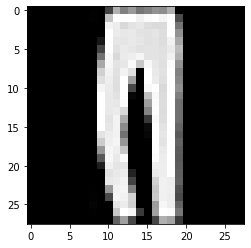

In [23]:
img = new_test_X[list0[0][0]]
pred = model.predict(tf.expand_dims(img,axis = 0))
plt.imshow(img, 'gray')
print(new_test_Y[list0[0][0]], np.argmax(pred))
print(new_test_Y[list0[0][0]], pred)

1 1
1 [[ 0.24230333  0.5191502  -0.13065502  0.1416693 ]]


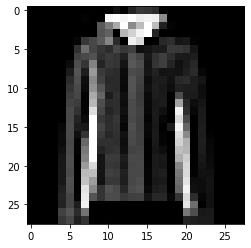

In [24]:
img = new_test_X[list1[0][0]]
pred = model.predict(tf.expand_dims(img,axis = 0))
plt.imshow(img, 'gray')
print(new_test_Y[list1[0][0]], np.argmax(pred))
print(new_test_Y[list1[0][0]], pred)

2 2
2 [[-0.05849627  0.02887132  0.849079    0.03335657]]


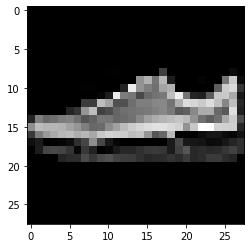

In [25]:
img = new_test_X[list2[0][0]]
pred = model.predict(tf.expand_dims(img,axis = 0))
plt.imshow(img, 'gray')
print(new_test_Y[list2[0][0]], np.argmax(pred))
print(new_test_Y[list2[0][0]], pred)

3 3
3 [[ 0.06089154 -0.05561351  0.19745886  0.88271654]]


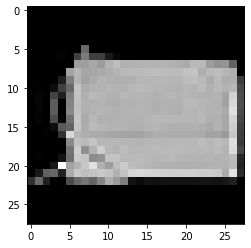

In [26]:
img = new_test_X[list3[0][0]]
pred = model.predict(tf.expand_dims(img,axis = 0))
plt.imshow(img, 'gray')
print(new_test_Y[list3[0][0]], np.argmax(pred))
print(new_test_Y[list3[0][0]], pred)

# Learning Lenet-5

In [27]:
model_lenet = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(5,5), strides=(1, 1), padding='same', filters=20),
                             tf.keras.layers.Activation('relu'),
                             tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                             tf.keras.layers.Conv2D(kernel_size=(5,5), strides=(1, 1), padding='same', filters=50),
                             tf.keras.layers.Activation('relu'),
                             tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=500),
                             tf.keras.layers.Activation('relu'),
                             tf.keras.layers.Dense(units=4),
                             tf.keras.layers.Softmax()
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 242,372
Trainable params: 242,372
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_lenet.compile(optimizer = tf.keras.optimizers.Adam(),
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [29]:
histroy = model_lenet.fit(new_train_X, new_train_Y, batch_size= 100, epochs=10)

Epoch 1/10
240/240 [==============================] - 10s 5ms/step - loss: 0.0848 - accuracy: 0.9728
Epoch 2/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0294 - accuracy: 0.9916
Epoch 3/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0196 - accuracy: 0.9943
Epoch 4/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0162 - accuracy: 0.9954
Epoch 5/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0099 - accuracy: 0.9973
Epoch 6/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0091 - accuracy: 0.9971
Epoch 7/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0048 - accuracy: 0.9983
Epoch 8/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 9/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0022 - accuracy: 0.9993
Epoch 10/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0026 - accuracy: 0.999

In [30]:
model_lenet.evaluate(new_test_X, new_test_Y)

125/125 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9868


[0.04773808270692825, 0.9867500066757202]

0 0
0 [[1.0000000e+00 1.0925053e-09 1.4580711e-13 3.1189987e-08]]


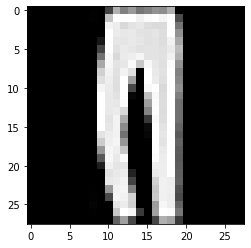

In [31]:
img = new_test_X[list0[0][0]]
pred = model_lenet.predict(tf.expand_dims(img,axis = 0))
plt.imshow(img, 'gray')
print(new_test_Y[list0[0][0]], np.argmax(pred))
print(new_test_Y[list0[0][0]], pred)

1 1
1 [[2.3527124e-07 9.9999976e-01 1.0576634e-12 5.0135651e-09]]


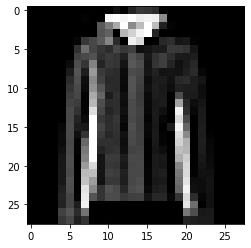

In [32]:
img = new_test_X[list1[0][0]]
pred = model_lenet.predict(tf.expand_dims(img,axis = 0))
plt.imshow(img, 'gray')
print(new_test_Y[list1[0][0]], np.argmax(pred))
print(new_test_Y[list1[0][0]], pred)

2 2
2 [[1.1454708e-13 1.3520332e-14 1.0000000e+00 8.6721057e-09]]


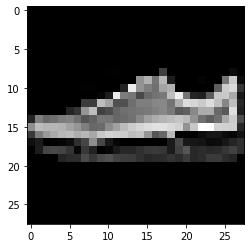

In [33]:
img = new_test_X[list2[0][0]]
pred = model_lenet.predict(tf.expand_dims(img,axis = 0))
plt.imshow(img, 'gray')
print(new_test_Y[list2[0][0]], np.argmax(pred))
print(new_test_Y[list2[0][0]], pred)

3 3
3 [[8.0983167e-14 6.1020591e-11 1.7630847e-10 1.0000000e+00]]


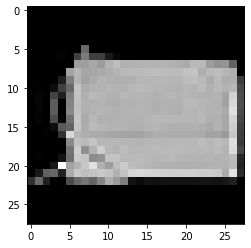

In [34]:
img = new_test_X[list3[0][0]]
pred = model_lenet.predict(tf.expand_dims(img,axis = 0))
plt.imshow(img, 'gray')
print(new_test_Y[list3[0][0]], np.argmax(pred))
print(new_test_Y[list3[0][0]], pred)